# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe
- Obtener y graficar los siguientes datos. Elegir el gráfico que mejor represente los datos

In [136]:
import json
import pandas as pd
import dateutil
import matplotlib.pyplot as plt
%matplotlib inline

with open('/home/daniel/Bases-de-datos-2/data/result2.json', 'r') as file:
    data = json.load(file)
df = pd.DataFrame(data["messages"])
df

,id,type,date,from,from_id,text,photo,width,height,file,...,media_type,mime_type,duration_seconds,actor,actor_id,action,members,inviter,edited,reply_to_message_id
0,1359,message,2020-11-01T14:09:24,Pablo Fracaro,user830260616,Y me esta trabando esto,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1360,message,2020-11-01T14:09:59,Andrea Navarro (juncotic.com),user23471390,Que error te da?,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1361,message,2020-11-01T14:10:23,Julian Ariel Campana,user925454557,d/M/y H:m,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1362,message,2020-11-01T14:10:28,Julian Ariel Campana,user925454557,Probalo así,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1363,message,2020-11-01T14:10:41,Julian Ariel Campana,user925454557,Más genérico,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1632,message,2021-09-27T20:21:52,Gabriel Arenas 🇦🇷,user192620519,Les dejo los links a videos y material en PowerBi,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,1633,message,2021-09-27T20:22:06,Gabriel Arenas 🇦🇷,user192620519,"[El video que vimos: , {'type': 'link', 'text'...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,1634,message,2021-09-27T20:25:27,Gabriel Arenas 🇦🇷,user192620519,"[Este otro ejemplo del que les hable, panel d...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,1635,message,2021-09-27T20:29:53,Gabriel Arenas 🇦🇷,user192620519,"[En esta página, encuentran datasets de difer...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cantidad de mensajes enviados por cada usuario

,mensajes
from,
Andrea Navarro (juncotic.com),11
Arian M,8
Bruno Romero,1
Daiana Ascurra,2
Daniel Beato,2
Danilo Cerna 2,1
Delfina Quintero,2
Douglas,2
Emiliano Muñoz,3


/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)


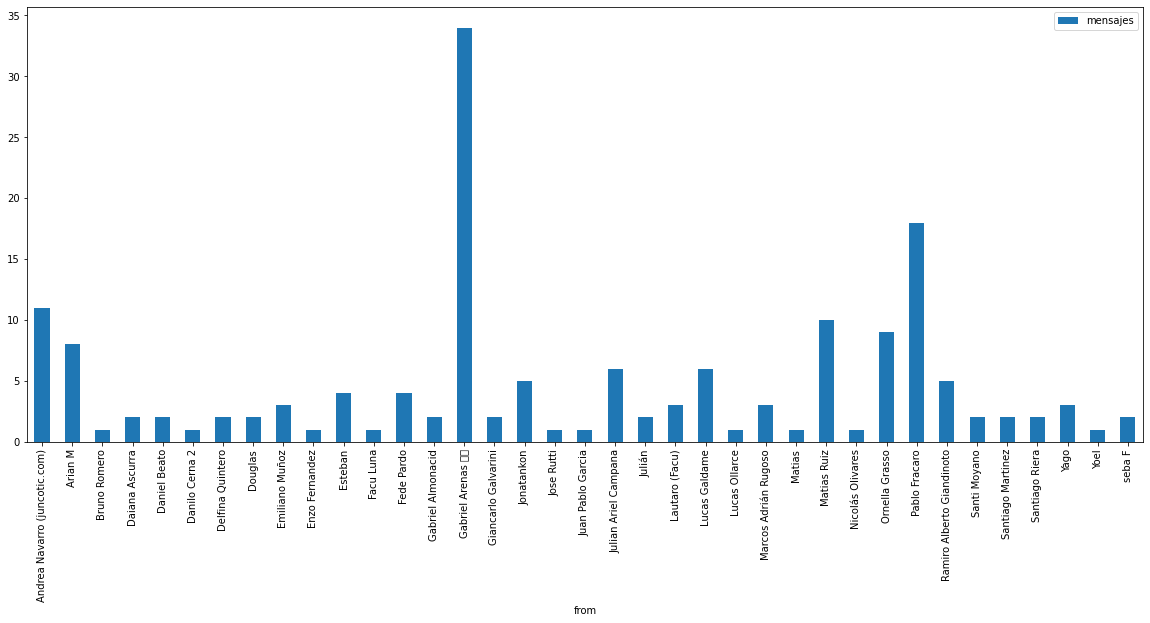

In [93]:
groups = ['from']
df2 = df.groupby( groups).agg(mensajes = ('text', 'count'))
df2.plot(kind='bar', figsize=(20,8))
df2





### Promedio de palabras utilizadas por mensaje por cada usuario

,total_words
from,
Andrea Navarro (juncotic.com),11.363636
Arian M,4.250000
Bruno Romero,4.000000
Daiana Ascurra,8.500000
Daniel Beato,3.000000
Danilo Cerna 2,8.000000
Delfina Quintero,7.000000
Douglas,4.500000
Emiliano Muñoz,6.333333


/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)


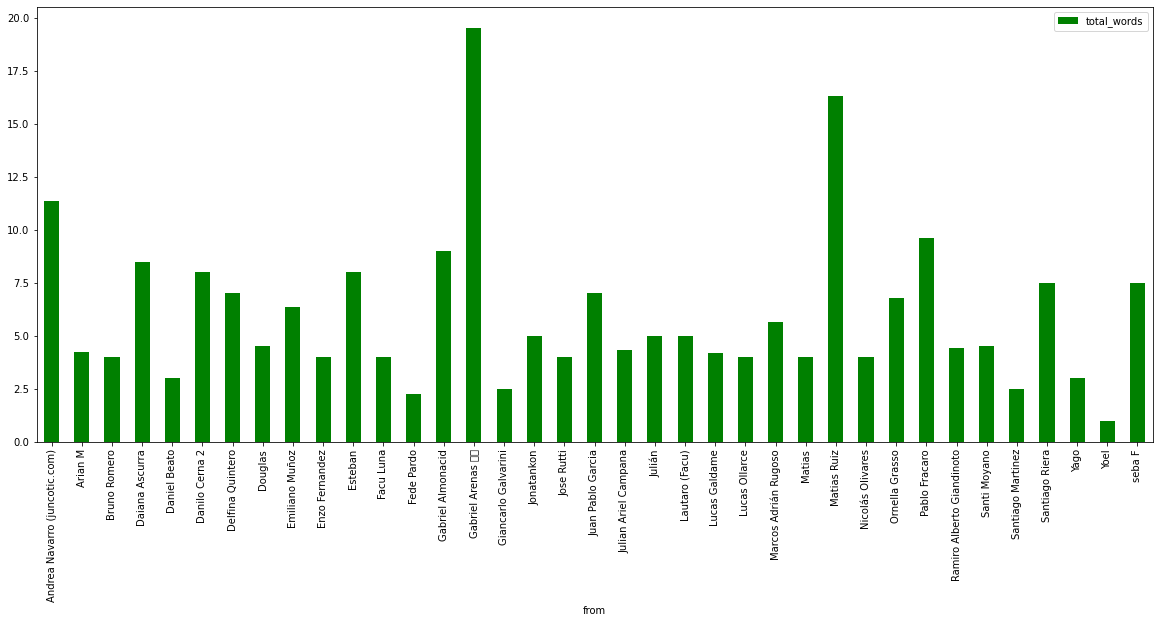

In [92]:
df['total_words'] = [len(str(x).split(" ")) for x in df['text']]
df2 = df.groupby(['from'])[['total_words']].mean()
df2.plot(kind='bar', figsize=(20,8), color="green")
df2

### Porcentaje de mensajes enviados por cada usuario

,average
from,
Andrea Navarro (juncotic.com),5.851064
Arian M,4.255319
Bruno Romero,0.531915
Daiana Ascurra,1.063830
Daniel Beato,1.063830
Danilo Cerna 2,0.531915
Delfina Quintero,1.063830
Douglas,1.063830
Emiliano Muñoz,1.595745


/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)


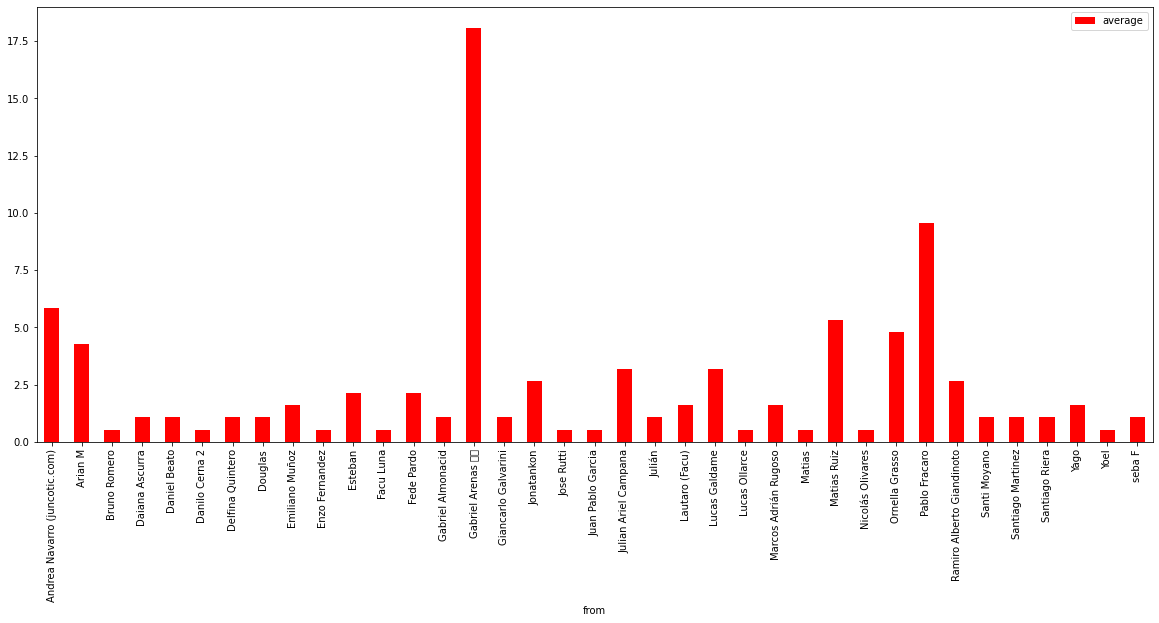

In [91]:
total_messages = df['id'].count()
df2 = df.groupby(['from']).agg(average=('id',lambda x: (x.count()/total_messages)*100))
df2.plot(kind='bar', figsize=(20,8), color="red")
df2

### Frecuencia de envío de mensaje dependiendo la hora del día

<ipython-input-97-69274e2ec5ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[1]
<ipython-input-97-69274e2ec5ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hora'][indice] = j[0]


,cantidad_mensajes
hora,
00,1
09,1
10,2
11,1
12,2
14,37
15,9
16,11
17,42


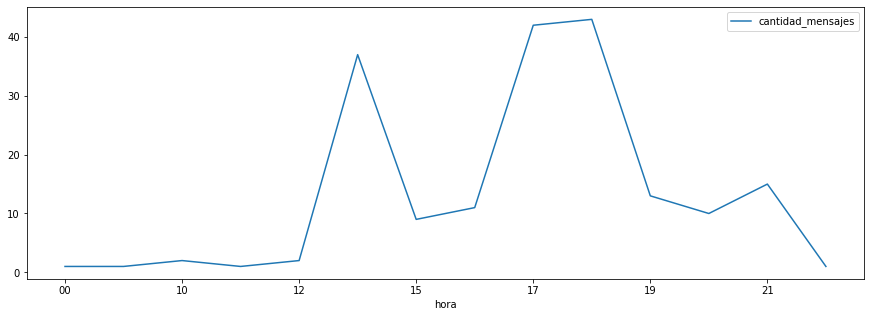

In [97]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[1]
    contador += 1
df['fecha'] = [str(x).split(":") for x in df['fecha']]
indice = int(0)
df['hora'] = ''
for j in df['fecha']:
    df['hora'][indice] = j[0]
    indice += 1  
df2 = df.groupby(df['hora']).agg(cantidad_mensajes=('id', "count"))
df2.plot(figsize=(15,5))
df2




     
    
    




### Frecuencia de envío de mensaje dependiendo del día de la semana

<ipython-input-98-6166f8be63c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dia'][contador] = i[0]


,cantidad_mensajes
dia,
0,117
1,7
3,3
4,20
5,4
6,37


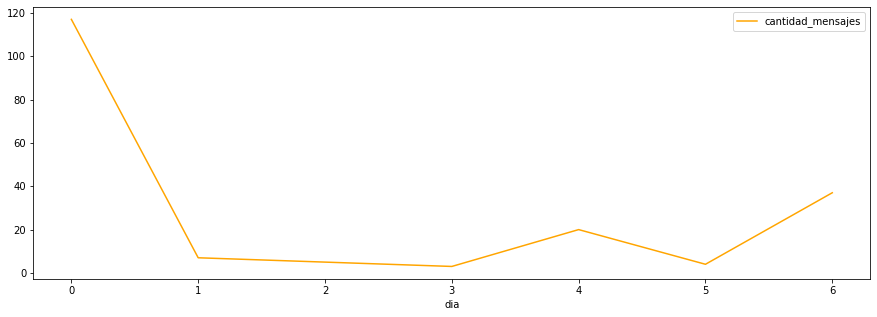

In [98]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
df['dia'] = ''
for i in df['fecha']:
    df['dia'][contador] = i[0]
    contador += 1
df['dia'] = pd.to_datetime(df['dia'], format="%Y-%m-%d") 
df2 = df.groupby(df['dia'].dt.weekday).agg(cantidad_mensajes = ('id', "count"))
df2.plot(figsize=(15,5), color="orange")
df2

### Hora del día preferida por cada usuario para enviar mensajes

<ipython-input-160-ccf3582e8ae7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[1]
<ipython-input-160-ccf3582e8ae7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hora'][indice] = j[0]
<ipython-input-160-ccf3582e8ae7>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time'][contador] = i[0]


,,cantidad_mensajes
from,time,
Andrea Navarro (juncotic.com),14,3
Arian M,18,4
Bruno Romero,19,1
Daiana Ascurra,20,1
Daniel Beato,18,1
Danilo Cerna 2,18,1
Delfina Quintero,21,1
Douglas,10,1
Emiliano Muñoz,17,2


/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)


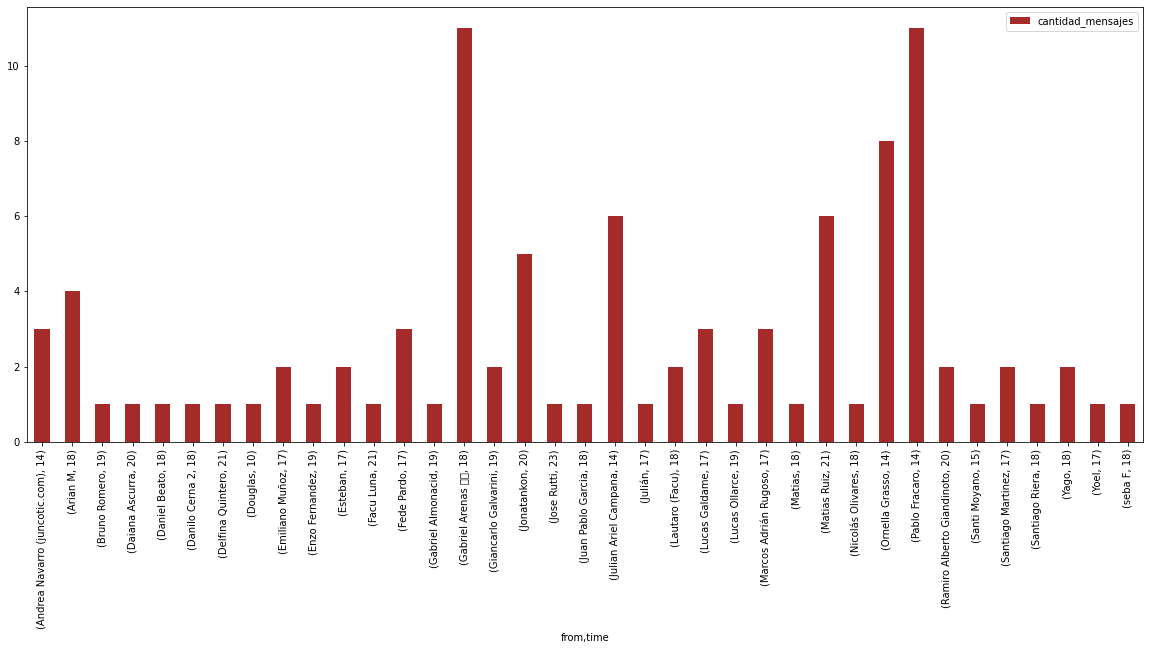

In [160]:

df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[1]
    contador += 1
df['fecha'] = [str(x).split(":") for x in df['fecha']]
indice = int(0)
df['hora'] = ''
for j in df['fecha']:
    df['hora'][indice] = j[0]
    indice += 1 
contador = 0
lista_horas = []
df2 = df.groupby(['from','hora'], as_index=False).agg(cantidad_mensajes = ('hora',"count"))
for i in df2['hora']:
    lista_horas.append((i, df2['cantidad_mensajes'][contador]))
    contador += 1
df2 = df2.groupby(['from'], as_index=False)[['cantidad_mensajes']].max()  
contador = 0
lista_maximos = []
for i in df2['cantidad_mensajes']:
    lista_maximos.append(i)
    contador += 1
df2['time'] = ''
contador = 0
for i in lista_horas:
    if contador < len(lista_maximos):
        if i[1] == lista_maximos[contador]:
            df2['time'][contador] = i[0]
            contador += 1
df2 = df2.set_index(['from','time'])
df2.plot(kind='bar', figsize=(20,8), color="brown")
df2

        
    


    
       

        


### Día de la semana preferida por cada usuario para enviar mensajes

<ipython-input-174-2d0052256da2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dia'][contador] = i[0]
<ipython-input-174-2d0052256da2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'][contador] = i[0]
<ipython-input-174-2d0052256da2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'][contador] = 'Lunes'
<ipython-input-174-2d0052256da2>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,,cantidad_mensajes
from,day,
Andrea Navarro (juncotic.com),Lunes,5
Arian M,Sábado,4
Bruno Romero,Domingo,1
Daiana Ascurra,Lunes,1
Daniel Beato,Lunes,2
Danilo Cerna 2,Lunes,1
Delfina Quintero,Lunes,2
Douglas,Lunes,2
Emiliano Muñoz,Lunes,3


/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)


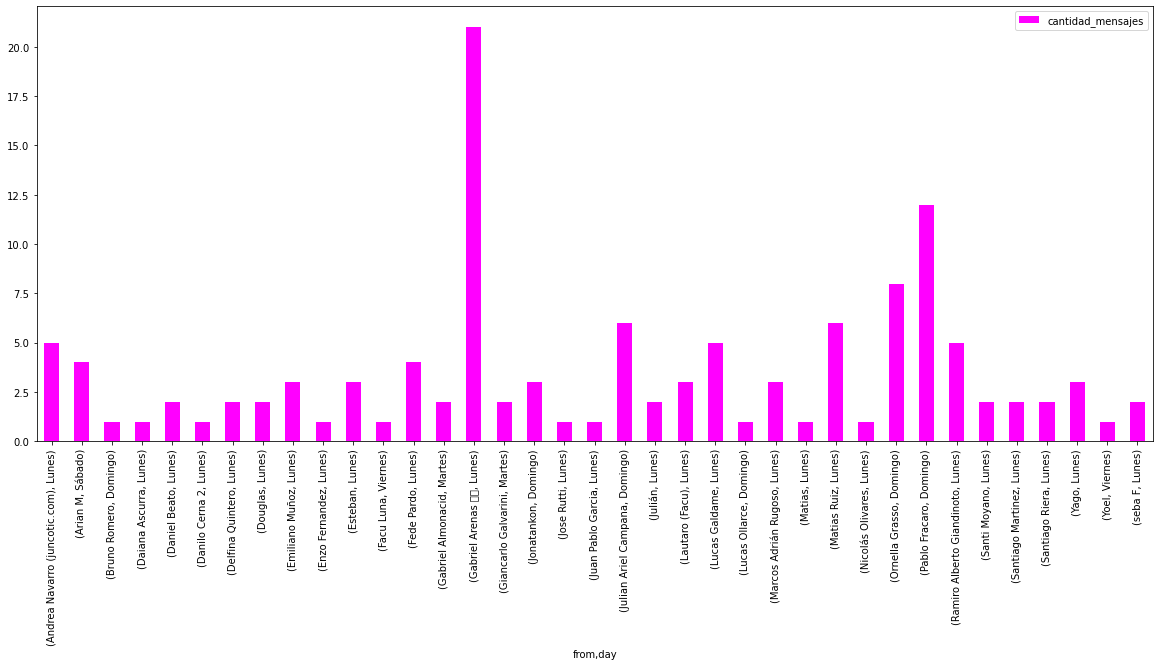

In [174]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
df['dia'] = ''
for i in df['fecha']:
    df['dia'][contador] = i[0]
    contador += 1
df['dia'] = pd.to_datetime(df['dia'], format="%Y-%m-%d") 
df2 = df.groupby(['from',df['dia'].dt.weekday], as_index=False).agg(cantidad_mensajes = ('id', "count"))
df_aux = df.groupby(['from',df['dia'].dt.weekday]).agg(cantidad_mensajes = ('id', "count"))
lista_indices = []
contador = 0
for i in df_aux.index:
    lista_indices.append((i[1], df_aux['cantidad_mensajes'][contador]))
    contador += 1
df2 = df2.groupby(['from'], as_index=False)[['cantidad_mensajes']].max()  
contador = 0
lista_maximos = []
for i in df2['cantidad_mensajes']:
    lista_maximos.append(int(i))
    contador += 1
df2['day'] = ''
contador = 0
for i in lista_indices:
    if contador < len(lista_maximos):
        if i[1] == lista_maximos[contador]:
            df2['day'][contador] = i[0]
            contador += 1
contador = 0
for i in df2['day']:
    if i == 0:
        df2['day'][contador] = 'Lunes'
        contador += 1
    if i == 1:
        df2['day'][contador] = 'Martes'
        contador += 1
    if i == 2:
        df2['day'][contador] = 'Miércoles'
        contador += 1
    if i == 3:
        df2['day'][contador] = 'Jueves'  
        contador += 1
    if i == 4:
        df2['day'][contador] = 'Viernes'
        contador += 1
    if i == 5:
        df2['day'][contador] = 'Sábado'
        contador += 1
    if i == 6:
        df2['day'][contador] = 'Domingo'    
        contador += 1
df2 = df2[['from', 'day', 'cantidad_mensajes']]
df2 = df2.set_index(['from','day'])
df2.plot(kind='bar', figsize=(20,8), color="magenta")
df2


    
    


### Cantidad promedio de mensajes enviados por hora para cada usuario

<ipython-input-203-6be4b69315ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[0]


,mensaje
from,
Andrea Navarro (juncotic.com),0.001389
Arian M,0.001010
Bruno Romero,0.000126
Daiana Ascurra,0.000253
Daniel Beato,0.000253
Danilo Cerna 2,0.000126
Delfina Quintero,0.000253
Douglas,0.000253
Emiliano Muñoz,0.000379


/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)


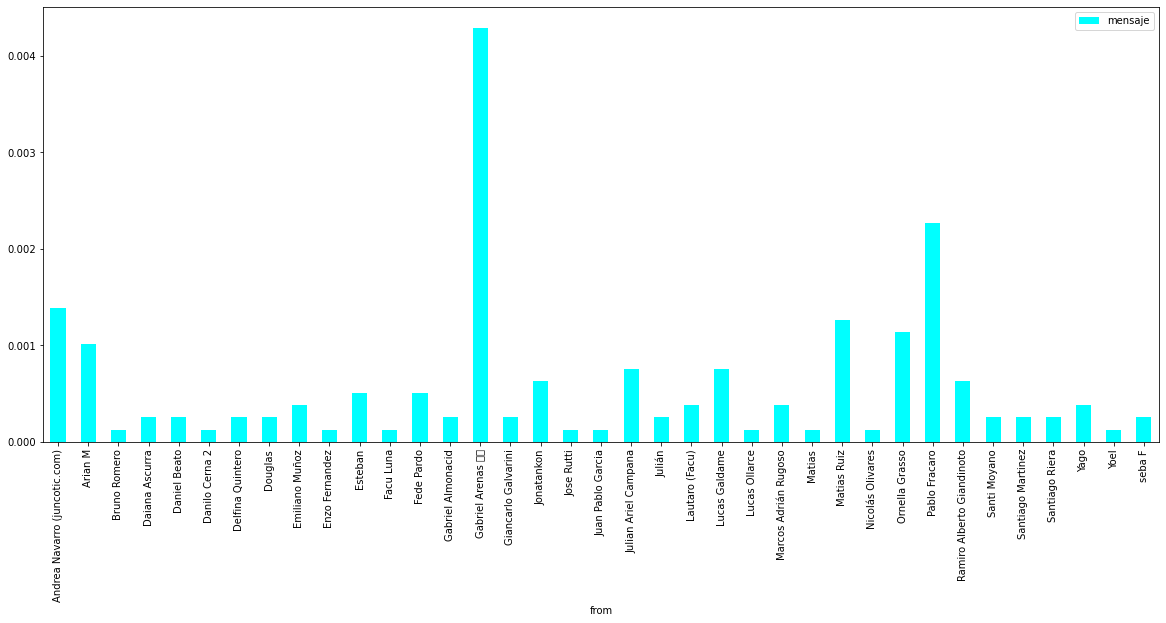

In [203]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[0]
    contador += 1
df['fecha'] = pd.to_datetime(df['fecha'], format="%Y-%m-%d")
numero_dias = (df['fecha'].max() - df['fecha'].min()).days
grupos = ['from']
df.groupby(grupos).agg(mensaje = ("text", lambda x: (x.count()/24)/numero_dias))
df2.plot(kind='bar', figsize=(20,8), color="cyan")
df2


### Cantidad de usuarios promedio que envían mensaje por cada día de la semana

<ipython-input-225-5917ff44563f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[0]


mensajes_totales
from                          fecha                  
Andrea Navarro (juncotic.com) 0              0.106061
                              1              0.021212
                              4              0.042424
                              6              0.063636
Arian M                       0              0.063636
                              5              0.084848
                              6              0.021212
Bruno Romero                  0              0.021212
Daiana Ascurra                1              0.021212
                              6              0.021212
Daniel Beato                  0              0.042424
Danilo Cerna 2                0              0.021212
Delfina Quintero              0              0.042424
Douglas                       0              0.042424
Emiliano Muñoz                0              0.063636
Enzo Fernandez                0              0.021212
Esteban                       0              0.063636
                              4              0.021212
Facu Luna                     0              0.021212
Fede Pardo                    0              0.084848
Gabriel Almonacid             1              0.042424
Gabriel Arenas 🇦🇷             0              0.445455
                              1              0.042424
                              3              0.021212
                              4              0.169697
                              6              0.042424
Giancarlo Galvarini           0              0.042424
Jonatankon                    4              0.042424
                              6              0.063636
Jose Rutti                    0              0.021212
Juan Pablo Garcia             0              0.021212
Julian Ariel Campana          6              0.127273
Julián                        0              0.042424
Lautaro (Facu)                0              0.063636
Lucas Galdame                 0              0.106061
                              6              0.021212
Lucas Ollarce                 0              0.021212
Marcos Adrián Rugoso          0              0.063636
Matias                        0              0.021212
Matias Ruiz                   0              0.127273
                              4              0.084848
Nicolás Olivares              0              0.021212
Ornella Grasso                0              0.021212
                              6              0.169697
Pablo Fracaro                 0              0.021212
                              1              0.021212
                              3              0.042424
                              4              0.042424
                              6              0.254545
Ramiro Alberto Giandinoto     0              0.106061
Santi Moyano                  0              0.042424
Santiago Martinez             0              0.042424
Santiago Riera                0              0.042424
Yago                          0              0.063636
Yoel                          4              0.021212
seba F                        0              0.042424

/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/daniel/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0, flags=flags)


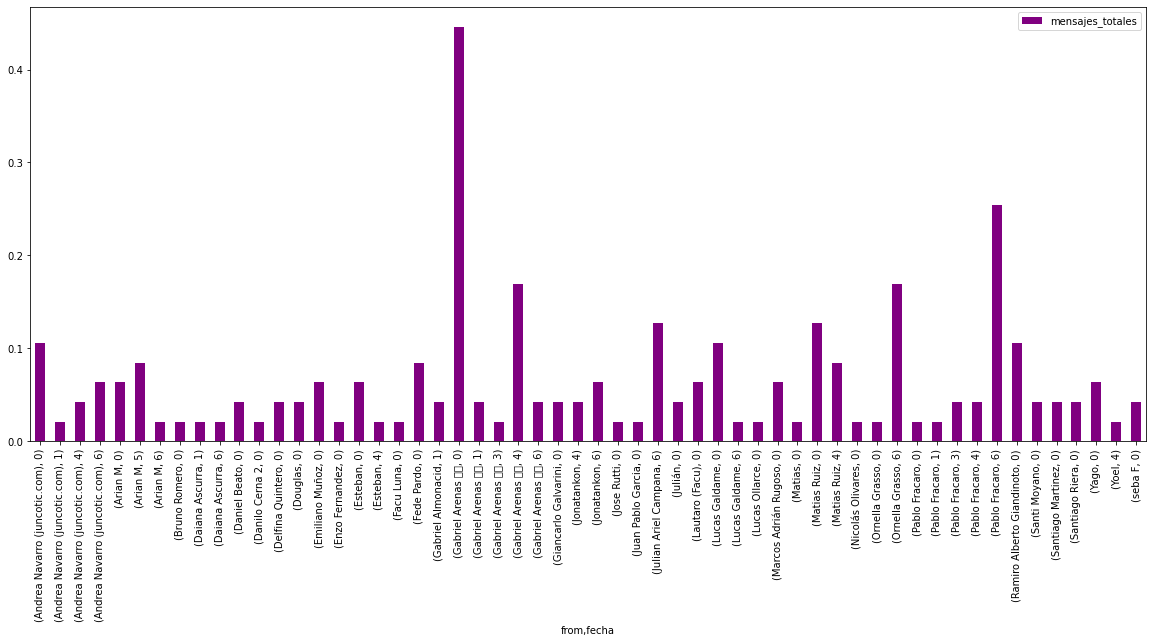

In [225]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[0]
    contador += 1
df['fecha'] = pd.to_datetime(df['fecha'], format="%Y-%m-%d")
numero_semanas = ((df['fecha'].max() - df['fecha'].min()).days)/7
grupos = ['from',df['fecha'].dt.weekday]
df_aux = df.groupby( grupos).agg(mensajes_totales=('from',lambda x: x.count()/numero_semanas))
df_aux.plot(kind='bar', figsize=(20,8), color="purple")
df_aux




### Cantidad de mensajes envíados por mes

<ipython-input-232-a79ebc22946b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[0]
<ipython-input-232-a79ebc22946b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['año'][contador] = i[0]


cantidad_mensajes
año  mes                   
2020 11                  89
2021 8                   50
     9                   49

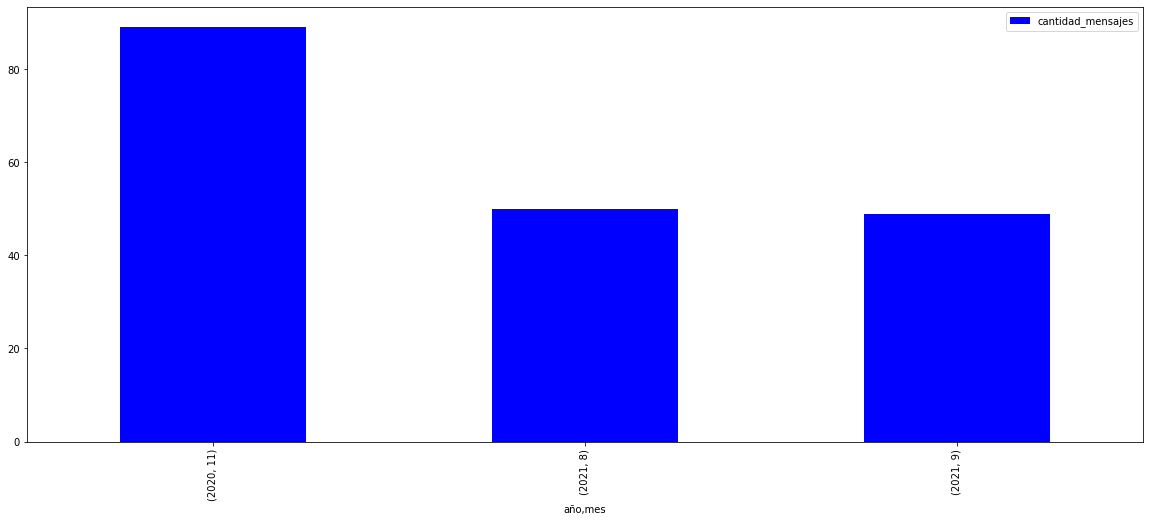

In [232]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[0]
    contador += 1
df['año'] = [str(x).split("-") for x in df['date']]
contador = int(0)
for i in df['año']:
    df['año'][contador] = i[0]
    contador += 1
df['mes'] = pd.to_datetime(df['fecha'], format = "%Y-%m-%d")
df2 = df.groupby(['año',df['mes'].dt.month]).agg(cantidad_mensajes = ('text', "count"))
df2.plot(kind='bar', figsize=(20,8), color="blue")
df2


### Cantidad mínima, máxima y promedio de palabras por mensaje

<ipython-input-258-755563ebfbec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cantidad_palabras'][i] = len(df['palabras'][i])


,minimo,maximo,promedio
type,,,
message,1,118,8.43617


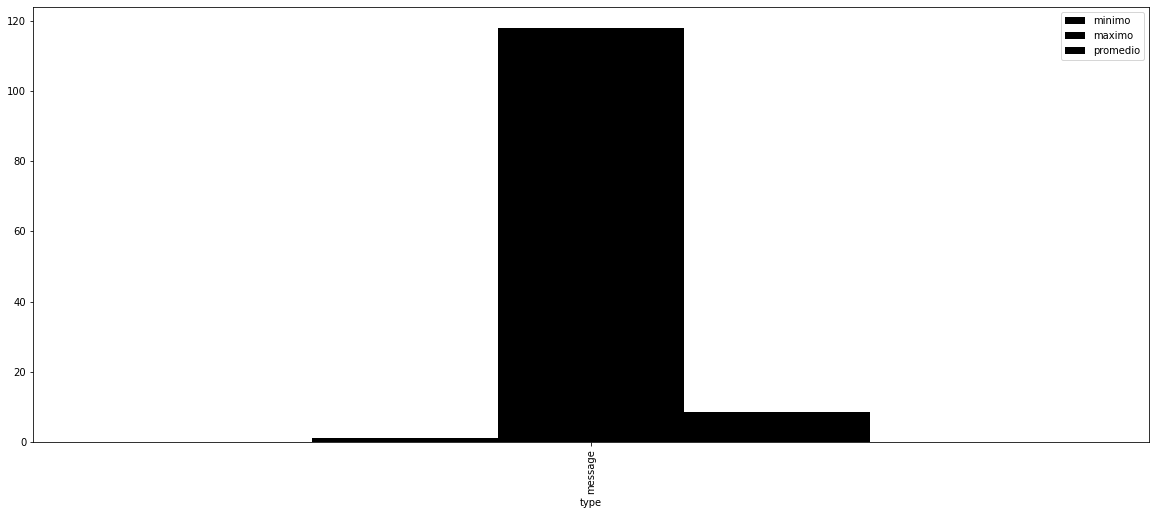

In [258]:
df['palabras'] = [str(x).split(" ") for x in df['text']]
df['cantidad_palabras'] = ''
for i in range(len(df)):
    df['cantidad_palabras'][i] = len(df['palabras'][i])
df2 = df.groupby(['type']).agg(minimo = ('cantidad_palabras', "min"), maximo = ('cantidad_palabras', "max"), promedio = ("cantidad_palabras", lambda x: (x.sum())/len(df['cantidad_palabras']))) 
df2 = df2.drop('service')
df2.plot(kind='bar', figsize=(20,8), color="black")
df2